### Logistic Regression in Tensorflow

In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [107]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

m = 10000
x_data = np.random.randn(m,1)
w_real = np.array([0.3]).reshape(1,1)
b_real = np.array(-0.2)
y_data_pre_noise = sigmoid(np.dot(x_data,w_real) + b_real)
y_data = np.random.binomial(1,y_data_pre_noise)

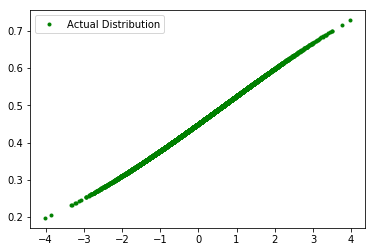

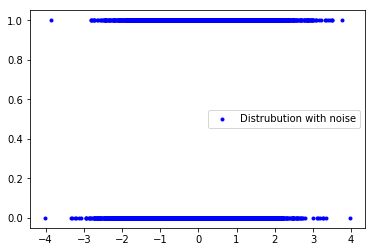

In [108]:
plt.figure(figsize=(6,4))
plt.plot(x_data, y_data_pre_noise, 'g.',label="Actual Distribution")
plt.legend()
plt.show()
plt.plot(x_data, y_data, 'b.',label="Distrubution with noise")
plt.legend()
plt.show()

Step#  0 , Cost: 0.811238 , Weights:  [[ 0.38161758]] , Biases:  [[ 0.88305151]]
Step#  1000 , Cost: 0.67754 , Weights:  [[ 0.31525457]] , Biases:  [[-0.17621396]]
Step#  2000 , Cost: 0.67754 , Weights:  [[ 0.31525469]] , Biases:  [[-0.17621878]]
Step#  3000 , Cost: 0.67754 , Weights:  [[ 0.31525469]] , Biases:  [[-0.17621878]]
Step#  4000 , Cost: 0.67754 , Weights:  [[ 0.31525469]] , Biases:  [[-0.17621878]]
Optimization steps complete at #  5000 , accuracy:  0.5693 , Cost: 0.67754 , Weights:  [[ 0.31525469]] , Biases:  [[-0.17621878]]
[[ 0.26136332]
 [ 0.42471185]
 [ 0.52651925]
 ..., 
 [ 0.63920266]
 [ 0.57701289]
 [ 0.49294168]]
[[1]
 [0]
 [1]
 ..., 
 [1]
 [1]
 [1]]


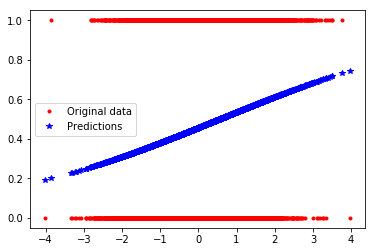

In [111]:
NUM_STEPS = 5000
g = tf.Graph()

with g.as_default():
    X = tf.placeholder(tf.float32,shape=[None,1])
    Y = tf.placeholder(tf.float32,shape=None)
    learning_rate = tf.placeholder(tf.float32,shape=None)
    
    with tf.name_scope('coefficients') as scope:
        W = tf.Variable(np.random.rand(1,1),dtype=tf.float32,name='weights')
        b = tf.Variable(np.random.rand(1,1),dtype=tf.float32,name='bias')
        y_pred = tf.add(tf.multiply(X, W), b)
        y_pred_sigmoid = tf.sigmoid(y_pred)   # for prediction

        
    with tf.name_scope('cost') as scope:
        cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=y_pred,targets=Y))
    
    with tf.name_scope('train') as scope:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
        
    with tf.name_scope('accuracy') as scope:
        delta = tf.abs((Y - y_pred_sigmoid))
        correct_prediction = tf.cast(tf.less(delta, tf.constant(0.5)), tf.int32)
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        for step in range(NUM_STEPS):
            sess.run(optimizer,{X: x_data, Y: y_data,learning_rate: 0.05 })
            if (step % 1000 == 0):
                c=sess.run(cost,feed_dict={X: x_data, Y: y_data})
                print("Step# ",step,", Cost:",c ,", Weights: ",sess.run(W),", Biases: ",sess.run(b))
        c = sess.run(cost,feed_dict={X: x_data, Y: y_data})
        a = sess.run(accuracy,feed_dict={X: x_data, Y: y_data})
        print("Optimization steps complete at # ",NUM_STEPS,", accuracy: ", a,", Cost:", c ,", Weights: ",sess.run(W),", Biases: ",sess.run(b))
        plt.plot(x_data, y_data, 'r.', label='Original data')
        plt.plot(x_data,sigmoid(x_data * np.array(sess.run(W))+sess.run(b)), 'b*',label='Predictions')
        plt.legend()
        plt.show()